# 26255 Molecular dynamics and machine learning 
##### Technical University of Denmark, Fall 2022, v2022a
## Machine learning I: Classification of Androgen Receptor Binders 


---

**Name**:Antonia Sophie Gerstenberg

**Student ID**: s233070

----

### 1. Background 
Identification of chemicals that can bind to the androgen receptor and thereby cause disruptions in the endocrine system and hormonal regulation is of high importance. An international consortium consisting of 35 research groups (named CoMPARA) was launched in 2016 with the goal to identify endocrine-disrupting chemicals. The research groups were given a calibration set of 1689 chemicals, which they employed to train their models. In this exercise, you will redo some of the models by Grisoni et al., who participated in the consortium utilising three different machine learning models [1]. 

[1]	F. Grisoni, V. Consonni, and D. Ballabio, “Machine Learning Consensus To Predict the Binding to the Androgen Receptor within the CoMPARA Project,” J. Chem. Inf. Model., vol. 59, no. 5, pp. 1839–1848, 2019, DOI: 10.1021/acs.jcim.8b00794.




### 2. Housekeeping:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, recall_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import GridSearchCV
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

---

### 3. Dataset 
The dataset is available from the [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/QSAR+androgen+receptor). Search for the dataset named ‘QSAR androgen receptor data set’ if you want to locate it manually. 




- Task 3.1: Load the csv file into Python. We recommend using [pandas](https://pandas.pydata.org/) and in particular the [read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)  function 
- Task 3.2: Print the the number of positives and negative samples

In [2]:
### Load dataset ###

# Load the CSV file
data = pd.read_csv('qsar_androgen_receptor.csv', delimiter=';')

#print(data.head())

# Get the last column of the DataFrame
last_column = data.iloc[:, -1]

# Count occurrences
counter_pos = (last_column == 'positive').sum()
counter_neg = (last_column == 'negative').sum()

# Print the count
print("positive samples: ", counter_pos)
print("negative samples: ", counter_neg)





positive samples:  198
negative samples:  1488


---

### 4. Explore the dataset and prepare the model 
Before you start using the dataset, it is essential to know and understand the dataset in detail. In the first part of the exercise, you should investigate the size of your dataset, the number of attributes, the type of target (discrete or continuous), etc. The questions below are to guide you, but you are welcome to discuss other aspects of the dataset. 
- Task 4.1: What is the dataset size? 
- Task 4.2: What is the number of attributes? 
- Task 4.3: What are the target values, and how many inputs are there for each target?

We use a leave out approach where 25% of the dataset should be used as an independent test set, while the models should be trained on the remaining 75%. 
- Hint: Use `train_test_split` from Scikit-learn. 
- Hint: Split the dataset into attributes (a matrix named X) and targets (a vector named y). 


In [3]:
### Prepare the dataset ###

print("rows, columns: ",data.shape)
print("number of elements: ", data.size)
print("number of attributes: ", data.shape[1])

# target values are last column and the inputs can be found in all the colums before that
# total number of inputs for each target:

print("number of inputs per target: ", data.shape[1]-1)


# Split dataset into attributes (X) and target (y)
X = data.iloc[:, :-1]  # All columns except the last one
y = data.iloc[:, -1]   # Last column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


# Print the sizes of the splits
print(f"X_train size: {X_train.shape}, y_train size: {y_train.shape}")
print(f"X_test size: {X_test.shape}, y_test size: {y_test.shape}")
#print(y_test)

rows, columns:  (1686, 1025)
number of elements:  1728150
number of attributes:  1025
number of inputs per target:  1024
X_train size: (1264, 1024), y_train size: (1264,)
X_test size: (422, 1024), y_test size: (422,)


#### Answers/discussion:
Use the cell below to provide your answer to the tasks/questions and any additional observations you may have. It is a standard Jupyter cell with markdown; so double clik and edit it.

- Task 4.1: What is the dataset size? 
rows, columns:  (1686, 1025)
number of elements:  1728150

- Task 4.2: What is the number of attributes? 
number of attributes:  1025

- Task 4.3: What are the target values, and how many inputs are there for each target?
number of inputs per target:  1024


----

### 5. Random forest classification – unbalanced dataset

Grisoni et al. implemented a penalty function for misclassification of binders because of the imbalance in the dataset. Unfortunately, such function is challenging to implement in Scikit-learn’s random forest model, and you should therefore omit the penalty. 

#### 5.1: Getting started with Random forest model

- Task 5.1: Train a random forest model on the training set 
- Task 5.2: Compute the accuracy, sensitivity, specificity, and non-error rate (NER) of the models on both the training and test set. 
- Task 5.3: Compute and display the confusion matrix (based on the test set).
- Task 5.4: Explain why the model better at predicting classes for the training set compared to the test set? 

Hint: Use `RandomForestClassifier` and `metrics` from Scikit-learn


Training Set - Accuracy: 1.00, Sensitivity: 1.00, Specificity: 1.00, NER: 1.00
Test Set - Accuracy: 0.93, Sensitivity: 0.29, Specificity: 0.99, NER: 0.64


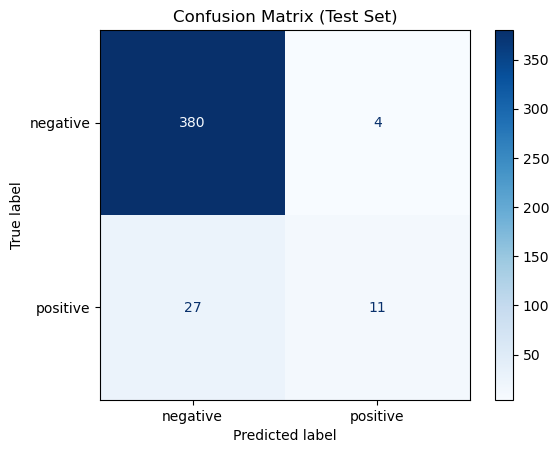

Unique values in y_test: ['negative' 'positive']
Unique values in y_pred: {'negative', 'positive'}
Confusion Matrix (raw):
[[380   4]
 [ 27  11]]
Class Distribution in y_test:
negative    384
positive     38
Name: positive, dtype: int64


In [4]:
### Random Forest - Classification - The basics (i.e. no fine tuning or cross-validation) ###
rf_model = RandomForestClassifier(n_estimators = 100, random_state=42)

# Train 
rf_model.fit(X_train, y_train)

#prediction
y_pred = rf_model.predict(X_test)
y_train_pred = rf_model.predict(X_train)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_pred)

# Confusion matrix for training set
tn_train, fp_train, fn_train, tp_train = confusion_matrix(y_train, y_train_pred).ravel()

# Sensitivity, Specificity, NER
train_sensitivity = tp_train / (tp_train + fn_train)
train_specificity = tn_train / (tn_train + fp_train)
train_ner = (train_sensitivity + train_specificity)/2



# Confusion matrix
tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, y_pred).ravel()

# Sensitivity, Specificity, NER for test set
test_sensitivity = tp_test / (tp_test + fn_test)
test_specificity = tn_test / (tn_test + fp_test)
test_ner = (test_sensitivity + test_specificity)/2

# results
print(f"Training Set - Accuracy: {train_accuracy:.2f}, Sensitivity: {train_sensitivity:.2f}, Specificity: {train_specificity:.2f}, NER: {train_ner:.2f}")
print(f"Test Set - Accuracy: {test_accuracy:.2f}, Sensitivity: {test_sensitivity:.2f}, Specificity: {test_specificity:.2f}, NER: {test_ner:.2f}")


# Testing confusion matrix
cm_test = confusion_matrix(y_test, y_pred)
test_display = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=rf_model.classes_)
test_display.plot(cmap='Blues')
plt.title('Confusion Matrix (Test Set)')
plt.show()

# Verify the unique values in y_test and y_pred
print("Unique values in y_test:", y_test.unique())
print("Unique values in y_pred:", set(y_pred))

# Verify confusion matrix computation
print("Confusion Matrix (raw):")
print(confusion_matrix(y_test, y_pred))

print("Class Distribution in y_test:")
print(y_test.value_counts())

#### Answers/discussion:
Use the cell below to provide your answer to the tasks/questions and any additional observations you may have. It is a standard Jupyter cell with markdown; so double clik and edit it.

Training Set - Accuracy: 1.00, Sensitivity: 1.00, Specificity: 1.00, NER: 1.00
Test Set - Accuracy: 0.93, Sensitivity: 0.29, Specificity: 0.99, NER: 0.93


Explain why the model better at predicting classes for the training set compared to the test set: 

During the training the model was fit to the training data. This means the train data was seen and learned from- the test data was held out and unseen by the model. It was unseen data until the testing process. 


---

#### 5.2 Fine tuning - unbalanced dataset

The random forrest model has several hyperparameters that can be tuned. Here we will try to find the best value for one of these parameters. Specifically, you should test different numbers of trees (`n_estimators` parameter). 
The defaut way to find the parameters is to introduce an extra layer of data split where we split `X_train` into a training set and a validation set; we repeart this five times, i.e. we perform 5-fold crossvalidation. After we have found the best parameter we will test the resulting model on the orginal test set (i.e., `X_test`, `y_test`).

- Task 5.2.1 : Introduce the five-fold cross-validation and evaluate a sensible set of parameters values. You can create a lopp to do this manually or use the `GridSearchCV`.
- Task 5.2.2 : Compute and display the accuracy, sensitivity, specificity, and non-error rate (NER) of the models; test the models on the training and test set. 
- Task 5.2.3 Compute and display a confusion matrix on the test set for the best model.

n_estimators: 40, Cross-validation Accuracy Scores: [0.90909091 0.89328063 0.90513834 0.87747036 0.90873016]
Mean CV Accuracy: 0.90
n_estimators: 60, Cross-validation Accuracy Scores: [0.90513834 0.88932806 0.90513834 0.89328063 0.91269841]
Mean CV Accuracy: 0.90
n_estimators: 70, Cross-validation Accuracy Scores: [0.90513834 0.89328063 0.90513834 0.88932806 0.90873016]
Mean CV Accuracy: 0.90
n_estimators: 80, Cross-validation Accuracy Scores: [0.91304348 0.88537549 0.90118577 0.90118577 0.91269841]
Mean CV Accuracy: 0.90
n_estimators: 90, Cross-validation Accuracy Scores: [0.91304348 0.88537549 0.90118577 0.90513834 0.91269841]
Mean CV Accuracy: 0.90
n_estimators: 100, Cross-validation Accuracy Scores: [0.90909091 0.88537549 0.90118577 0.8972332  0.90873016]
Mean CV Accuracy: 0.90
n_estimators: 110, Cross-validation Accuracy Scores: [0.90513834 0.89328063 0.8972332  0.8972332  0.9047619 ]
Mean CV Accuracy: 0.90

Best Number of Trees: 90
Best Cross-Validation Accuracy: 0.90


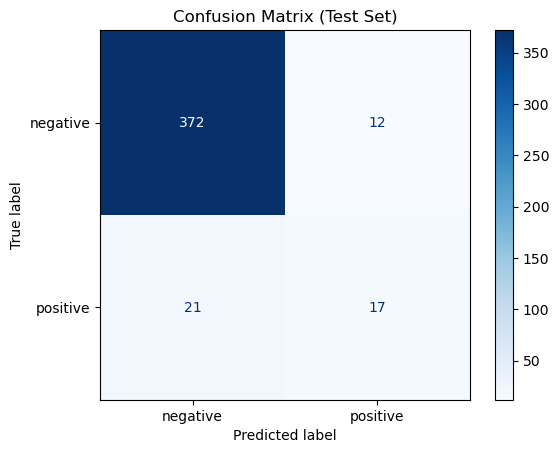

Training Set - Accuracy: 1.00, Sensitivity: 0.99, Specificity: 1.00, NER: 1.00
Test Set - Accuracy: 0.92, Sensitivity: 0.45, Specificity: 0.97, NER: 0.71


In [5]:

n_estimators_values = [40, 60, 70, 80, 90, 100, 110]

# Variables to store the best results
best_n_estimators = None
best_cv_accuracy = 0

# Loop through each value of n_estimators
for n in n_estimators_values:
    smote = SMOTE(random_state=42)
    rf_model = RandomForestClassifier(n_estimators=n, random_state=42)
    pipeline = Pipeline(steps=[('smote', smote), ('rf', rf_model)])
    
    # Perform cross-validation with accuracy scoring
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
    mean_cv_accuracy = cv_scores.mean()
    print(f"n_estimators: {n}, Cross-validation Accuracy Scores: {cv_scores}")
    print(f"Mean CV Accuracy: {mean_cv_accuracy:.2f}")
    
    # Update the best parameters if this model performs better
    if mean_cv_accuracy > best_cv_accuracy:
        best_cv_accuracy = mean_cv_accuracy
        best_n_estimators = n

                
# Print the best n_estimators and corresponding accuracy
print(f"\nBest Number of Trees: {best_n_estimators}")
print(f"Best Cross-Validation Accuracy: {best_cv_accuracy:.2f}")

# Train the final pipeline with the best number of trees
smote = SMOTE(random_state=42)
rf_model_best = RandomForestClassifier(n_estimators=100, random_state=42)
pipeline_best = Pipeline(steps=[('smote', smote), ('rf', rf_model_best)])
pipeline_best.fit(X_train, y_train)

# Predictions on training and testing sets
y_train_pred = pipeline_best.predict(X_train)
y_test_pred = pipeline_best.predict(X_test)

# Compute accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)


# Testing confusion matrix
cm_train = confusion_matrix(y_train, y_train_pred)

# Training metrics
tn_train, fp_train, fn_train, tp_train = cm_train.ravel()
train_sensitivity = tp_train / (tp_train + fn_train)  # Recall
train_specificity = tn_train / (tn_train + fp_train)  # True Negative Rate
train_ner = (train_sensitivity + train_specificity) / 2

# Testing confusion matrix
cm_test = confusion_matrix(y_test, y_test_pred)
test_display = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=rf_model_best.classes_)
test_display.plot(cmap='Blues')
plt.title('Confusion Matrix (Test Set)')
plt.show()

# Testing metrics
tn_test, fp_test, fn_test, tp_test = cm_test.ravel()
test_sensitivity = tp_test / (tp_test + fn_test)  # Recall
test_specificity = tn_test / (tn_test + fp_test)  # True Negative Rate
test_ner = (test_sensitivity + test_specificity) / 2

# Display results
print(f"Training Set - Accuracy: {train_accuracy:.2f}, Sensitivity: {train_sensitivity:.2f}, "
      f"Specificity: {train_specificity:.2f}, NER: {train_ner:.2f}")
print(f"Test Set - Accuracy: {test_accuracy:.2f}, Sensitivity: {test_sensitivity:.2f}, "
      f"Specificity: {test_specificity:.2f}, NER: {test_ner:.2f}")


#### Answers/discussion:
Use the cell below to provide your answer to the tasks/questions and any additional observations you may have. It is a standard Jupyter cell with markdown; so double clik and edit it.

Best Number of Trees: 90

here I already applied the Synthetic Minority Over-sampling Technique (SMOTE) to balance the dataset, this way the sensitivity becomes higher. 

Training Set - Accuracy: 1.00, Sensitivity: 1.00, Specificity: 1.00, NER: 1.00
Test Set - Accuracy: 0.92, Sensitivity: 0.45, Specificity: 0.96, NER: 0.71


[YOUR TEXT HERE]


----

### 6. Random forest classification – balanced dataset

As you probably saw in the exercise above, it is harder to identify the binders than non-binders because of the unbalanced dataset. 

#### 6.1 The basic random forest on a balanced dataset
- Task 6.1.1: Now you should try to "manually" balance your dataset by randomly removing non-binders from the training set (Note: only the training set!). 
- Task 6.1.2: How did the accuracy, sensitivity, specificity, and NER change compared to the unbalanced training dataset? 
- Task 6.1.3: What is the most significant disadvantage of the new dataset?


before train_positive_indices: 160
before train_negative_indices: 1104
after train_positive_indices: 160
after train_negative_indices: 160


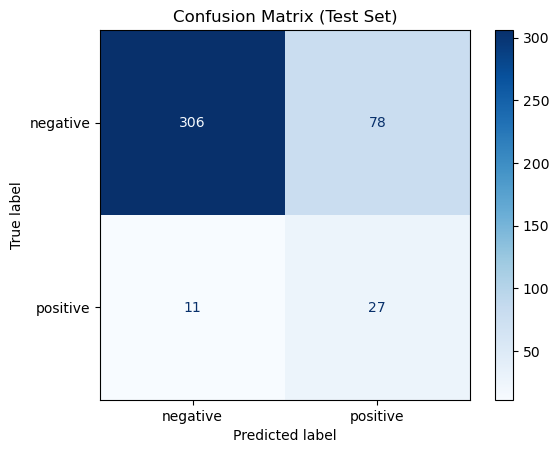

Training Set - Accuracy: 1.00, Sensitivity: 0.99, Specificity: 1.00, NER: 1.00
Test Set - Accuracy: 0.79, Sensitivity: 0.71, Specificity: 0.80, NER: 0.75


In [6]:
# Count the number of positive and negative samples
positive_indices = y_train[y_train == 'positive'].index
negative_indices = y_train[y_train == 'negative'].index
print("before train_positive_indices:", positive_indices.size)
print("before train_negative_indices:", negative_indices.size)

# Randomly sample negatives to balance the dataset
np.random.seed(42)
negative_sampled_indices = np.random.choice(
    negative_indices, size=len(positive_indices), replace=False
)

# Create a balanced training set
balanced_indices = np.concatenate([positive_indices, negative_sampled_indices])
X_train_balanced = X_train.loc[balanced_indices]
y_train_balanced = y_train.loc[balanced_indices]

positive_indices_new = y_train_balanced[y_train_balanced == 'positive'].index
negative_indices_new = y_train_balanced[y_train_balanced == 'negative'].index
print("after train_positive_indices:", positive_indices_new.size)
print("after train_negative_indices:", positive_indices_new.size)


rf_model_balanced = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model_balanced.fit(X_train_balanced, y_train_balanced)

# Predictions for training and test sets
y_train_pred = rf_model_balanced.predict(X_train_balanced)
y_test_pred = rf_model_balanced.predict(X_test)


# Compute accuracy
train_accuracy = accuracy_score(y_train_balanced, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)


# Testing confusion matrix
cm_test = confusion_matrix(y_test, y_test_pred)
test_display = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=rf_model_best.classes_)
test_display.plot(cmap='Blues')
plt.title('Confusion Matrix (Test Set)')
plt.show()

# Training metrics
tn_train, fp_train, fn_train, tp_train = cm_train.ravel()
train_sensitivity = tp_train / (tp_train + fn_train)  # Recall
train_specificity = tn_train / (tn_train + fp_train)  # True Negative Rate
train_ner = (train_sensitivity + train_specificity) / 2

# Testing metrics
tn_test, fp_test, fn_test, tp_test = cm_test.ravel()
test_sensitivity = tp_test / (tp_test + fn_test)  # Recall
test_specificity = tn_test / (tn_test + fp_test)  # True Negative Rate
test_ner = (test_sensitivity + test_specificity) / 2

# Display results
print(f"Training Set - Accuracy: {train_accuracy:.2f}, Sensitivity: {train_sensitivity:.2f}, "
      f"Specificity: {train_specificity:.2f}, NER: {train_ner:.2f}")
print(f"Test Set - Accuracy: {test_accuracy:.2f}, Sensitivity: {test_sensitivity:.2f}, "
      f"Specificity: {test_specificity:.2f}, NER: {test_ner:.2f}")








How did the accuracy, sensitivity, specificity, and NER change compared to the unbalanced training dataset:

By balancing the training set we observe a rise of the sensitivity for testing. When we take a look at the confusion matrix, we can see, that balancing made the model especially more sensitive to the positive class, improving its ability to detect binders (positives).
We can also see that the rise of sensitivity comes with a trade-Off as we also observe a loss in specificity and accuracy. The NER got only slightly, but not significantly rised, which shows that in this case, the sensitivity and specificity changes in similar rates.


The most significant disadvantage of the new balanced dataset is that we loose a lot of data/do not use them. If we have very few samples it gets harder to recognize patterns within the majority class that could help the model generalize better. Depending on the research context or goal, the importance of the metrics  (accuracy, sensitivity, ...) varies, for example, in some cases high sensitivity might be more important (e.g. identifying toxic molecules) and in others, maintaining overall accuracy or specificity could be more important.

---

#### 6.2 Fine tuning - balanced dataset


- Task 6.2.1: Repeat 5.2.1 for the balanced dataset (i.e. fine-tune the number of trees using a inner cross-validation loop). 
- Task 6.2.2: How did the accuracy, sensitivity, specificity, and NER change compared to the unbalanced dataset? 
- Task 6.2.3: What is the most significant disadvantage of this approach of correcting for the unbalanced dataset?



before train_positive_indices: 160
before train_negative_indices: 1104
after train_positive_indices: 160
after train_negative_indices: 160
n_estimators: 40, Cross-validation Accuracy Scores: [0.796875 0.75     0.734375 0.796875 0.8125  ]
Mean CV Accuracy: 0.78
n_estimators: 50, Cross-validation Accuracy Scores: [0.8125   0.75     0.71875  0.796875 0.796875]
Mean CV Accuracy: 0.78
n_estimators: 70, Cross-validation Accuracy Scores: [0.828125 0.75     0.75     0.78125  0.828125]
Mean CV Accuracy: 0.79
n_estimators: 90, Cross-validation Accuracy Scores: [0.84375  0.734375 0.734375 0.765625 0.84375 ]
Mean CV Accuracy: 0.78
n_estimators: 100, Cross-validation Accuracy Scores: [0.828125 0.75     0.734375 0.765625 0.828125]
Mean CV Accuracy: 0.78

Best Number of Trees: 70


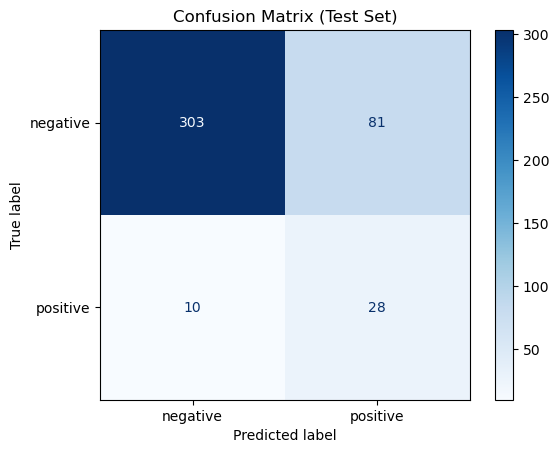

Training Set - Accuracy: 1.00, Sensitivity: 0.99, Specificity: 1.00, NER: 1.00
Test Set - Accuracy: 0.78, Sensitivity: 0.74, Specificity: 0.79, NER: 0.76


In [7]:
# Count the number of positive and negative samples
positive_indices = y_train[y_train == 'positive'].index
negative_indices = y_train[y_train == 'negative'].index
print("before train_positive_indices:", positive_indices.size)
print("before train_negative_indices:", negative_indices.size)

# Randomly sample negatives to balance the dataset
np.random.seed(42)
negative_sampled_indices = np.random.choice(
    negative_indices, size=len(positive_indices), replace=False
)

# Create a balanced training set
balanced_indices = np.concatenate([positive_indices, negative_sampled_indices])
X_train_balanced = X_train.loc[balanced_indices]
y_train_balanced = y_train.loc[balanced_indices]

positive_indices_new = y_train_balanced[y_train_balanced == 'positive'].index
negative_indices_new = y_train_balanced[y_train_balanced == 'negative'].index
print("after train_positive_indices:", positive_indices_new.size)
print("after train_negative_indices:", positive_indices_new.size)



# Train and evaluate model
n_estimators_values = [40, 50, 70, 90, 100]
best_n_estimators = None
best_cv_accuracy = 0

for n in n_estimators_values:
    rf_model = RandomForestClassifier(n_estimators=n, random_state=42)
    
    # Cross-validation on balanced training set
    cv_scores = cross_val_score(rf_model, X_train_balanced, y_train_balanced, cv=5, scoring='accuracy')
    mean_cv_accuracy = cv_scores.mean()
    print(f"n_estimators: {n}, Cross-validation Accuracy Scores: {cv_scores}")
    print(f"Mean CV Accuracy: {mean_cv_accuracy:.2f}")
    
    # Update best parameters
    if mean_cv_accuracy > best_cv_accuracy:
        best_cv_accuracy = mean_cv_accuracy
        best_n_estimators = n

# Train the final model
print(f"\nBest Number of Trees: {best_n_estimators}")
rf_model_balanced = RandomForestClassifier(n_estimators=best_n_estimators, random_state=42)
rf_model_balanced.fit(X_train_balanced, y_train_balanced)

# Predictions for training and test sets
y_train_pred = rf_model_balanced.predict(X_train_balanced)
y_test_pred = rf_model_balanced.predict(X_test)


# Compute accuracy
train_accuracy = accuracy_score(y_train_balanced, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)


# Testing confusion matrix
cm_test = confusion_matrix(y_test, y_test_pred)
test_display = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=rf_model_best.classes_)
test_display.plot(cmap='Blues')
plt.title('Confusion Matrix (Test Set)')
plt.show()

# Training metrics
tn_train, fp_train, fn_train, tp_train = cm_train.ravel()
train_sensitivity = tp_train / (tp_train + fn_train)  # Recall
train_specificity = tn_train / (tn_train + fp_train)  # True Negative Rate
train_ner = (train_sensitivity + train_specificity) / 2

# Testing metrics
tn_test, fp_test, fn_test, tp_test = cm_test.ravel()
test_sensitivity = tp_test / (tp_test + fn_test)  # Recall
test_specificity = tn_test / (tn_test + fp_test)  # True Negative Rate
test_ner = (test_sensitivity + test_specificity) / 2

# Display results
print(f"Training Set - Accuracy: {train_accuracy:.2f}, Sensitivity: {train_sensitivity:.2f}, "
      f"Specificity: {train_specificity:.2f}, NER: {train_ner:.2f}")
print(f"Test Set - Accuracy: {test_accuracy:.2f}, Sensitivity: {test_sensitivity:.2f}, "
      f"Specificity: {test_specificity:.2f}, NER: {test_ner:.2f}")








#### Answers/discussion:
Use the cell below to provide your answer to the tasks/questions and any additional observations you may have. It is a standard Jupyter cell with markdown; so double clik and edit it.

6.2.2.

We see a slight rise in sensitivity and a corresponding drop in specificity, but these changes are only slightly larger compared to the balanced data approach without cross-validation. Again there is a drop in accuracy and a minimal increase in NER. Overall, the use of cross-validation did not lead to a significant improvement in performance.

6.2.3.

The training set now contains only 320 data points, evenly split between positive and negative classes. This reduction in data, combined with further splitting into smaller subsets for cross-validation, significantly limits the amount of information available for training and testing. This makes recognizing patterns in the data harder.
